In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime


## Loading and preparing the data

In [2]:
stop_events = pd.read_csv("../Intermediate_Data/stop_events_with_all_features.csv", parse_dates=[1, 5, 6, 18, 19])

stop_events.head()



,id,date,stopCode,aimedArrival,aimedDeparture,actualArrival,actualDeparture,vehicle,workid,patternId,...,mean_dwell_prev_by_stop_code_and_hour_and_day,median_durations_by_segment_code,median_durations_by_segment_code_and_hour,median_durations_by_segment_code_and_hour_and_day,median_dwell_dest_durations_by_stop_code,median_dwell_prev_durations_by_stop_code,median_dwell_dest_by_stop_code_and_hour,median_dwell_prev_by_stop_code_and_hour,median_dwell_dest_by_stop_code_and_hour_and_day,median_dwell_prev_by_stop_code_and_hour_and_day
0,167_101_1,2018-09-18,1200BOB20158,2018-09-18 07:02:00,2018-09-18 07:02:00,2018-09-18 07:02:03,2018-09-18 07:02:08,186,167_101_1,167_79,...,452.786885,103.0,95.0,97.0,25.0,309.0,8.0,532.0,6.0,540.0
1,167_101_1,2018-09-18,1200BOB20156,2018-09-18 07:03:00,2018-09-18 07:03:00,2018-09-18 07:02:25,2018-09-18 07:02:30,186,167_101_1,167_79,...,22.050000,17.0,16.0,15.0,4.0,25.0,4.0,8.0,4.0,6.0
2,167_101_1,2018-09-18,1200BOB20155,2018-09-18 07:04:00,2018-09-18 07:04:00,2018-09-18 07:02:48,2018-09-18 07:02:53,186,167_101_1,167_79,...,7.820896,18.0,17.0,17.0,9.0,4.0,5.0,4.0,5.0,4.0
3,167_101_1,2018-09-18,1200BOB20153,2018-09-18 07:05:00,2018-09-18 07:05:00,2018-09-18 07:03:11,2018-09-18 07:03:16,186,167_101_1,167_79,...,20.272727,20.0,18.0,18.0,26.0,9.0,32.5,5.0,38.0,5.0
4,167_101_1,2018-09-18,1200BOB20151,2018-09-18 07:07:00,2018-09-18 07:07:00,2018-09-18 07:03:58,2018-09-18 07:04:51,186,167_101_1,167_79,...,40.876923,47.0,43.0,43.0,38.0,26.0,45.0,32.5,43.0,38.0


In [3]:
stop_events["aimedArrival"] = stop_events["aimedArrival"].astype("datetime64[ns]")
stop_events["aimedDeparture"] = stop_events["aimedDeparture"].astype("datetime64[ns]")
stop_events["prev_aimedArrival"] = stop_events["prev_aimedArrival"].astype("datetime64[ns]")
stop_events["prev_aimedDeparture"] = stop_events["prev_aimedDeparture"].astype("datetime64[ns]")
stop_events["prev_actualArrival"] = stop_events["prev_actualArrival"].astype("datetime64[ns]")
stop_events["prev_actualDeparture"] = stop_events["prev_actualDeparture"].astype("datetime64[ns]")



stop_events.head(30)

print(stop_events.shape)

stop_events = stop_events.dropna(axis=0)

# # stop_events = stop_events[stop_events.id != "NaN"]

print(stop_events.shape)

stop_events = stop_events.drop(['vehicle', 'workid', 'workCode','tripCode','match'], axis=1)

(4256583, 53)
(4252801, 53)


In [24]:
by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['to_centre_dist'], np.linspace(0,10,11))])['segment_duration'].mean()

In [25]:
by_hour_and_distance = by_hour_and_distance.reset_index()
by_hour_and_distance.columns = ['hour', 'distance', 'mean duration']
by_hour_and_distance=by_hour_and_distance.pivot('hour', 'distance')

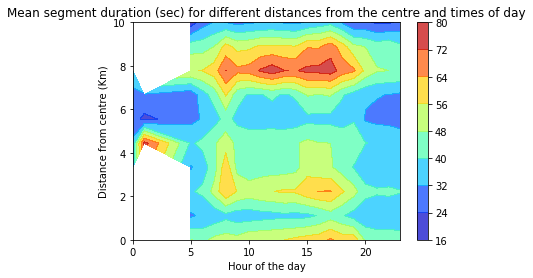

In [38]:
X=np.linspace(0,10,10)
Y=by_hour_and_distance.index.values.astype(float)
Z=by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Distance from centre (Km)")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean segment duration (sec) for different distances from the centre and times of day");

In [39]:
stop_events['diff_in_jd_from_median_by_segement'] = stop_events['segment_duration'] - stop_events['median_durations_by_segment_code']


In [43]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['to_centre_dist'], np.linspace(0,10,11))])['diff_in_jd_from_median_by_segement'].mean()


In [44]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'distance', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'distance')

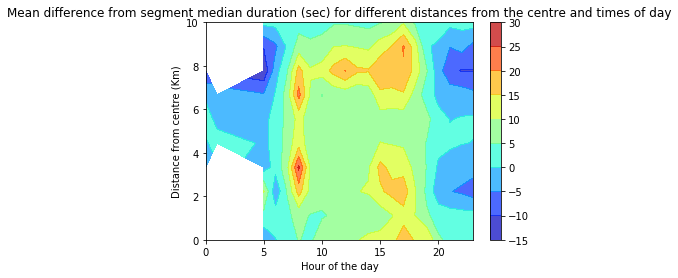

In [46]:
X=np.linspace(0,10,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=mean_diff_from_median_by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Distance from centre (Km)")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec) for different distances from the centre and times of day");

In [57]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['direction_degrees'], np.linspace(-90,90,11))])['diff_in_jd_from_median_by_segement'].mean()


In [58]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'direction', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'direction')

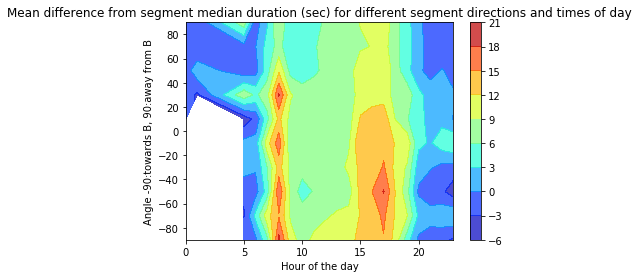

In [59]:
X=np.linspace(-90,90,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=mean_diff_from_median_by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Angle -90:towards B, 90:away from B")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec) for different segment directions and times of day");


In [54]:
np.arccos(1) -90

-90.0

In [60]:
stop_events.columns

Index(['id', 'date', 'stopCode', 'aimedArrival', 'aimedDeparture',
       'actualArrival', 'actualDeparture', 'patternId', 'publicName',
       'scheduledStart', 'prev_stopCode', 'prev_aimedArrival',
       'prev_aimedDeparture', 'prev_actualArrival', 'prev_actualDeparture',
       'timingPoint', 'segment_code', 'line_distance', 'midpoint_lat',
       'midpoint_lon', 'to_centre_dist', 'direction', 'direction_degrees',
       'segment_name', 'dwell_duration_dest', 'dwell_duration_prev',
       'segment_duration', 'timetable_segment_duration', 'arrival_hour',
       'arrival_day', 'mean_durations_by_segment_code',
       'mean_durations_by_segment_code_and_hour',
       'mean_durations_by_segment_code_and_hour_and_day',
       'mean_dwell_dest_durations_by_stop_code',
       'mean_dwell_prev_durations_by_stop_code',
       'mean_dwell_dest_by_stop_code_and_hour',
       'mean_dwell_prev_by_stop_code_and_hour',
       'mean_dwell_dest_by_stop_code_and_hour_and_day',
       'mean_dwell_pre